In [2]:
import pandas as pd
from scipy.stats import rankdata
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
age_filtered_df = df[(df['age'] >= 20) & (df['age'] <= 40)]

smokers = age_filtered_df[age_filtered_df['smoker'] == "yes"]['charges'].reset_index(drop=True)
non_smokers = age_filtered_df[age_filtered_df['smoker'] == "no"]['charges'].reset_index(drop=True)

combined_df = pd.DataFrame({
    'Курящие': smokers,
    'Не курящие': non_smokers
})

combined_df.head(15)




,Курящие,Не курящие
0,39611.75770,4449.46200
1,36837.46700,21984.47061
2,37701.87680,3866.85520
3,38711.00000,3756.62160
4,35585.57600,7281.50560
5,51194.55914,6406.41070
6,39774.27630,2721.32080
7,38709.17600,1826.84300
8,37742.57570,2395.17155
9,14711.74380,4149.73600


In [19]:
print(smokers.shape)
print(non_smokers.shape)

(119,)
(445,)


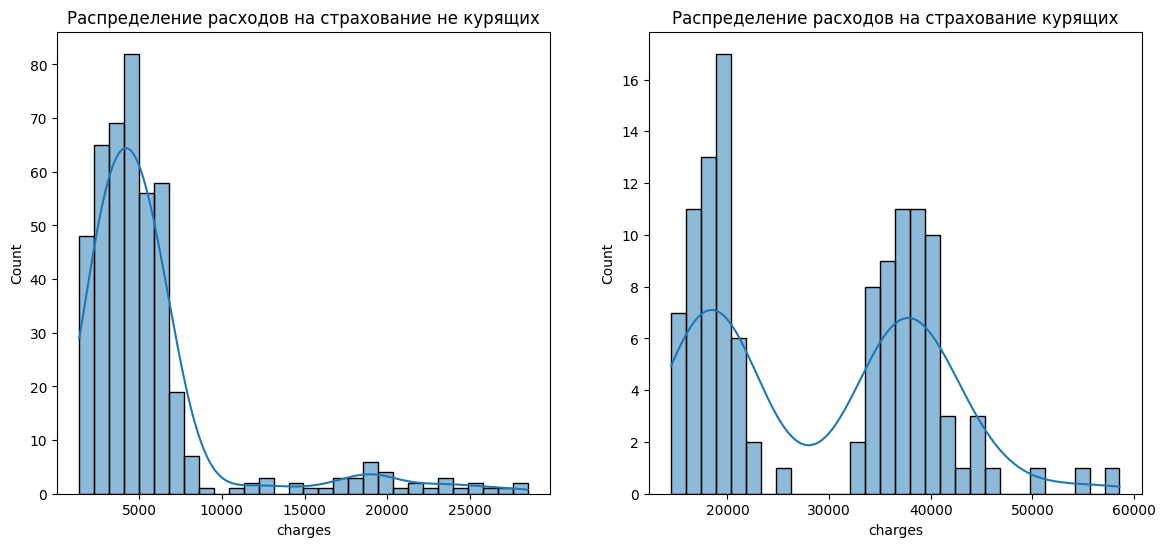

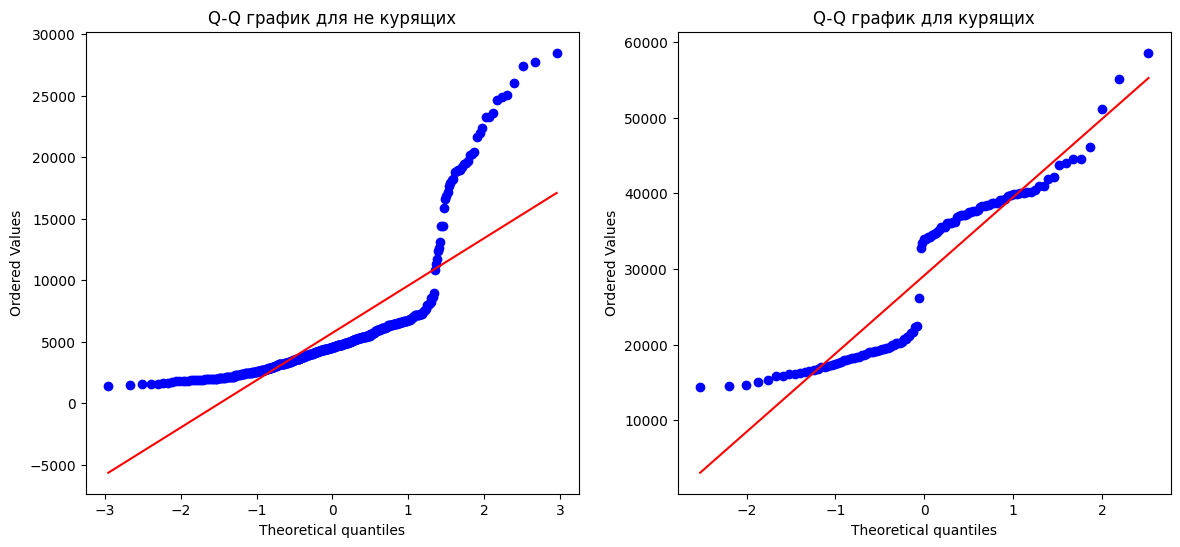

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(non_smokers, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Распределение расходов на страхование не курящих')

sns.histplot(smokers, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Распределение расходов на страхование курящих')

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

stats.probplot(non_smokers, dist="norm", plot=axes[0])

axes[0].set_title('Q-Q график для не курящих')

stats.probplot(smokers, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q график для курящих')

plt.show()


## Критерий Вилкоконса 

In [22]:
# Слияние двух выборок
all_data = np.concatenate([smokers, non_smokers])

# Ранжирование объединенных данных 
ranks = rankdata(all_data)
print(sorted(ranks))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 1

In [31]:
ranks_smokers = ranks[:len(smokers)]
ranks_non_smokers = ranks[len(non_smokers):]

# Сумма рангов для каждой группы
sum_ranks_younger = np.sum(ranks_smokers)
sum_ranks_older = np.sum(ranks_non_smokers)

# print(ranks_older)
print(sorted(ranks_non_smokers))

[2.0, 7.0, 17.0, 19.0, 21.0, 24.0, 27.0, 30.0, 31.0, 35.0, 36.0, 41.0, 45.0, 48.0, 54.0, 60.0, 61.0, 63.0, 75.0, 81.0, 85.0, 90.0, 95.0, 97.0, 100.0, 107.0, 109.0, 111.0, 116.0, 118.0, 119.0, 122.0, 124.0, 127.0, 135.0, 146.0, 147.0, 151.0, 152.0, 153.0, 170.0, 173.0, 174.0, 179.0, 182.0, 184.0, 185.0, 189.0, 192.0, 196.0, 199.0, 203.0, 207.0, 209.0, 210.0, 212.0, 215.0, 216.0, 223.0, 224.0, 225.0, 226.0, 228.0, 233.0, 236.0, 241.0, 247.0, 261.0, 270.0, 271.0, 277.0, 283.0, 285.0, 287.0, 289.0, 291.0, 294.0, 298.0, 299.0, 304.0, 310.0, 311.0, 314.0, 315.0, 317.0, 318.0, 320.0, 329.0, 333.0, 340.0, 346.0, 351.0, 357.0, 358.0, 360.0, 364.0, 368.0, 379.0, 381.0, 384.0, 389.0, 391.0, 396.0, 403.0, 406.0, 411.0, 412.0, 413.0, 421.0, 454.0, 456.0, 467.0, 470.0, 480.0, 486.0, 490.0, 492.0, 494.0, 498.0]


In [33]:


ranks_smokers = ranks[:len(smokers)]
ranks_non_smokers = ranks[len(non_smokers):]

# Сумма рангов для каждой группы
sum_ranks_smokers = np.sum(ranks_smokers)
sum_ranks_non_smokers = np.sum(ranks_non_smokers)

# Минимальная сумма рангов
W = min(sum_ranks_smokers, sum_ranks_non_smokers)

# Размеры выборок
n1 = len(smokers)
n2 = len(non_smokers)

# Расчёт ожидаемого значения и дисперсии
E_W = n1 * (n1 + n2 + 1) / 2
Var_W = n1 * n2 * (n1 + n2 + 1) / 12

# Вычисление z-статистики
z = (W - E_W) / np.sqrt(Var_W)

# Вывод результатов
print(f"Сумма рангов курящей группы: {sum_ranks_smokers}")
print(f"Сумма рангов не курящей группы: {sum_ranks_non_smokers}")
print(f"W-статистика: {W}")
print(f"Ожидаемое значение W: {E_W}")
print(f"Дисперсия W: {Var_W}")
print(f"z-статистика: {z}")

# Проверка против критического значения на уровне значимости 0.05
# Для двустороннего теста используйте z-критическое значение 1.96 (или найдите в таблице нормального распределения)
if abs(z) > 1.96:
    print("Отвергаем нулевую гипотезу: средние расходы статистически различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет достаточных доказательств различия средних расходов.")


Сумма рангов курящей группы: 58813.0
Сумма рангов не курящей группы: 27752.0
W-статистика: 27752.0
Ожидаемое значение W: 33617.5
Дисперсия W: 2493297.9166666665
z-статистика: -3.7146504440777095
Отвергаем нулевую гипотезу: средние расходы статистически различаются.


## Критерий Колмогорова-Смирнова

In [34]:
all_data = np.concatenate([smokers, non_smokers])


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 1

In [35]:
Z = np.sort(all_data)

In [40]:
def empirical_cdf(data, values):
    return np.array([np.sum(data <= v) / len(data) for v in values])

F_X = empirical_cdf(smokers, Z)
F_Y = empirical_cdf(non_smokers, Z)
print(sum(F_X), sum(F_Y))

70.77310924369742 339.1191011235964


In [39]:
# Статистика Колмогорова-Смирнова
D_mn = np.max(np.abs(F_X - F_Y))
print(f"D_{len(smokers)},{len(non_smokers)} = {D_mn:.4f}")

D_119,445 = 0.9281


In [41]:

# Параметры
alpha = 0.05
m = 119
n = 445

# Вычисление критического значения
D_alpha = np.sqrt(-0.5 * np.log(alpha / 2) * (m + n) / (m * n))
D_alpha


0.14015813169448757

## Критерий Ансари-Брэдли


In [42]:

non_smokers_charges = non_smokers
smokers_charges = smokers

# Объединение данных
combined_data = np.concatenate([non_smokers_charges, smokers_charges])
ranks = rankdata(combined_data)

In [43]:
# Разделение рангов по группам
ranks_non_smokers = ranks[:len(non_smokers_charges)]
ranks_smokers = ranks[len(non_smokers_charges):]

In [44]:
# Вычисление статистики Ансари-Брэдли
N = len(non_smokers_charges) + len(smokers_charges)
A_mn = np.sum(np.abs(ranks_non_smokers - (N + 1) / 2))

In [45]:
# Ожидаемое значение и дисперсия
E_A_mn = (len(non_smokers_charges) * (N + 1)) / 4
D_A_mn = (len(non_smokers_charges) * len(smokers_charges) * (N + 1) * (N - 1)) / (48 * (N - 1))


In [46]:
# Стандартизированная статистика
A_mn_star = (A_mn - E_A_mn) / np.sqrt(D_A_mn)

A_mn, E_A_mn, D_A_mn, A_mn_star

(54328.5, 62856.25, 623324.4791666666, -10.801333330315808)